<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lesson3---Data-blocks;-Multi-label-classification;-Segmentation" data-toc-modified-id="Lesson3---Data-blocks;-Multi-label-classification;-Segmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lesson3 - Data blocks; Multi-label classification; Segmentation</a></span><ul class="toc-item"><li><span><a href="#Multi-label-prediction-with-Planet-Amazon-dataset" data-toc-modified-id="Multi-label-prediction-with-Planet-Amazon-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Multi-label prediction with Planet Amazon dataset</a></span></li><li><span><a href="#Getting-the-data" data-toc-modified-id="Getting-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Getting the data</a></span></li><li><span><a href="#Multiclassification" data-toc-modified-id="Multiclassification-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multiclassification</a></span></li><li><span><a href="#fin" data-toc-modified-id="fin-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>fin</a></span></li></ul></li></ul></div>

---
本notebook在fastai v3 课程3的notebook基础上，运行出结果后，对相应**知识点进行补充或总结**，同时整理了相应的**xmind文档。**  

<img src="assests/lesson3/lesson3xmind.jpg" width="500">

xmind下载地址[点击这里](https://github.com/greebear/fast.ai-notes/blob/master/xmind/lesson3.xmind) 

---
<font color='green'>
    
**希望达到的效果**
- 回忆录：学过对应内容，浏览一遍nb后，就能快速回忆起知识点
- 优化工具：实践过程中，能在对应的笔记中快速找到调优方法

**学习方法推荐**
- 一边观看fastai视频一边运行notebook
- 完成学习后，通过xmind笔记回忆所有知识点

<font color='blue'>
    
本notebook的内容与图片参考于：   
- fastai v3 lesson3 notebook [Lesson3 - planet](https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson3-planet.ipynb) 

---

# Lesson3 - Data blocks; Multi-label classification; Segmentation

## Multi-label prediction with Planet Amazon dataset 

---
`%reload_ext autoreloa`    在执行用户代码前，重新装入 软件的扩展和模块  
`%autoreload 2`    自动重载%aimport排除的模块之外的所有模块  
`%matplotlib inline`    将matplotlib绘制图像在Jupyter Notebook中展示  

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

---
## Getting the data

The planet dataset isn't available on the [fastai dataset page](https://course.fast.ai/datasets) due to copyright restrictions. You can download it from Kaggle however. Let's see how to do this by using the [Kaggle API](https://github.com/Kaggle/kaggle-api) as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal (depending on your platform you may need to modify this slightly to either add `source activate fastai` or similar, or prefix `pip` with a path. Have a look at how `conda install` is called for your platform in the appropriate *Returning to work* section of https://course.fast.ai/. (Depending on your environment, you may also need to append "--user" to the command.)

In [4]:
! {sys.executable} -m pip install kaggle --upgrade

     |████████████████████████████████| 61kB 2.2MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=cd2170f9f46c43d32479382fa0d31b4e54d909ada5333a427df1cb9cb43f8c99
  Stored in directory: /tmp/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Created wheel for python-slugify: filename=python_slugify-3.0.4-py2.py3-none-any.whl size=4789 sha256=75ef2be425deb4622e4bbf4d6186445099d086050a3c6e858651102ab57e30eb
  Stored in directory: /tmp/.cache/pip/wheels/24/23/f5/c260686f9180cd755a30123e607207e0f39eba249b7b4b432c
Successfully built kaggle python-slugify


---
Then you need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal). For Windows, uncomment the last two commands.

In [6]:
! mkdir -p ~/.kaggle/
! cp kaggle.json ~/.kaggle/

# For Windows, uncomment these two commands
# ! mkdir %userprofile%\.kaggle
# ! move kaggle.json %userprofile%\.kaggle

You're all set to download the data from [planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space). You **first need to go to its main page and accept its rules**, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a `403 forbidden` error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on *Rules* tab, and then scroll to the bottom to find the *accept* button).

In [7]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/tmp/.fastai/data/planet')

In [8]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
! unzip -q -n {path}/train_v2.csv.zip -d {path}

 98%|████████████████████████████████████████▎| 590M/600M [00:03<00:00, 222MB/s]
100%|█████████████████████████████████████████| 600M/600M [00:03<00:00, 202MB/s]
  0%|                                                | 0.00/159k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 159k/159k [00:00<00:00, 10.7MB/s]


To extract the content of this file, we'll need 7zip, so uncomment the following line if you need to install it (or run `sudo apt install p7zip-full` in your terminal).

In [9]:
! conda install --yes --prefix {sys.prefix} -c haasad eidl7zip

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - eidl7zip


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    eidl7zip-1.0.0             |                1         565 KB  haasad
    --------------------------

And now we can unpack the data (uncomment to run - this might take a few minutes to complete).

In [10]:
! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path.as_posix()}

## Multiclassification

Contrary to the pets dataset studied in last lesson, here each picture can have multiple labels. If we take a look at the csv file containing the labels (in 'train_v2.csv' here) we see that each 'image_name' is associated to several tags separated by spaces.

---
**why csv?**
- 每张图片有多个标签，所以不能用文件夹名称来代表标签。
- kaggle提供了一个csv文件，csv包含每张图片对应的多个标签。

In [11]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

---
- **Transforms**

默认情况下每张图片都会水平翻转，设置flip_vert=True可以加入垂直翻转(也就是尝试8个可能的方向)。

- **Warp**

透视形变。卫星图片没有这个需求，所以关闭，max_warp=0.   
因为卫星图片都是统一的格式——即卫星上俯拍地球，不存在透视形变的数据出现；  
而如猫狗等物体识别任务中，喂入网络的图片可能是各种方向角度拍摄的图片，所以在训练数据中加入透视形变可以提高模型的泛化性能。

In [12]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

We use parentheses around the data block pipeline below, so that we can use a multiline statement without needing to add '\\'.

---
`from_folder(path)`数据路径

`label_from_csv`标签来源于csv文件
- para:
    - sep=' ': 根据‘ ’(空格)分隔开 —— 两个label之间用空格隔开
    - folder='train-jpg': 图片所在文件夹
    - suffix='.jpg': 图片文件后缀
    
`random_split_by_pct(0.2)` 从数据集中随机取20%作为验证集

In [13]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

---
`transform(tfms, size=128)`  利用tfms设置进行数据转换实现数据增强的效果

`databunch()`  创建一个databunch

`normalize(imagenet_stats)`  根据imagenet数据分布(均值mean与方差std)归一化新数据

**备注：**因为我们加载的是在ImageNet上训练的预训练模型，所以要用ImageNet的数据分布。

In [14]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

`show_batch` still works, and show us the different labels separated by `;`.

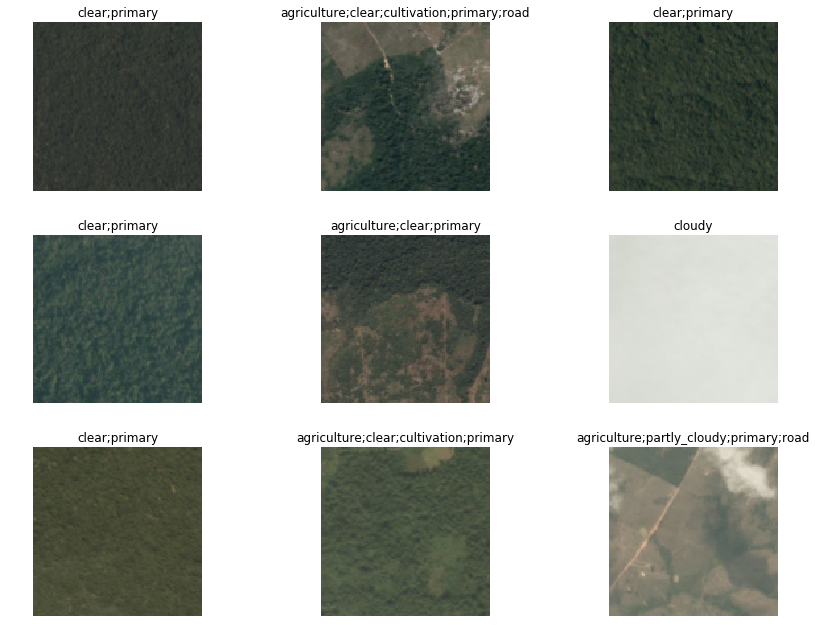

In [15]:
data.show_batch(rows=3, figsize=(12,9))

To create a `Learner` we use the same function as in lesson 1. Our base architecture is resnet50 again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of `accuracy`. In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.

As for Fbeta, it's the metric that was used by Kaggle on this competition. See [here](https://en.wikipedia.org/wiki/F1_score) for more details.

In [16]:
# accuracy??

可用resnet34、50，在这里resnet50表现更好

In [17]:
arch = models.resnet50

---
**partial**
- 样例：
```python
acc_02 = partial(accuracy_thresh, thresh=0.2)
```
- 等价于：
```python
def acc_02(inp, targ): return accuracy_thresh(inp, targ, thresh=0.2)
```
- python3有一个称为`partial`的函数，它接受一些函数和一些关键字和值的列表，并创建一个与此函数完全相同的新函数（`accuracy_thresh`），  
但总是使用该关键字参数（`thresh=0.2`）调用它。

---
**评估指标 metrics**
- acc_02: 
    - 计算准确度，阈值为0.2
    - 因为本次任务是多标签分类，所以不用单标签分类器的accuracy
- f_score
    - 计算F-score，阈值为0.2
    - 原理资料参考：https://en.wikipedia.org/wiki/F1_score
    - 备注：评估指标不会改变模型的输出结果

In [18]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 110MB/s]


We use the LR Finder to pick a good learning rate.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


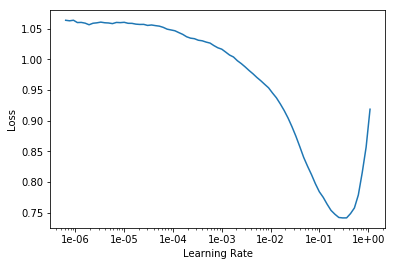

In [19]:
learn.lr_find()
learn.recorder.plot()

接下来我们开始拟合网络的头部  
备注：这里原文是"Then we can fit the head of our network."
- 什么是网络的头部(head of network)?
    - 习惯上将网络送入数据的地方称为底部(bottom)，而将网络前向传播到最后几层线性层(Linear Layer)称为头部(head)
    - 这与我们常说的微调模型时，更新网络最后几层参数的位置一致
- 实际上，微调的内容不止头部(head)部分，还有网络bn层中的均值(mean)和方差(variance)，可利用learn.summary()查看可训练层

找到上面图片中坡度最陡的位置，本例在1e-2附近，设定学习率为 lr = 0.01

In [20]:
lr = 0.01
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.139162,0.117133,0.942819,0.899051,02:36
1,0.113527,0.099695,0.952847,0.913654,02:30
2,0.100180,0.091127,0.955296,0.922008,02:33
3,0.095121,0.088150,0.957018,0.924759,02:30
4,0.091953,0.086894,0.956480,0.925080,02:30


In [21]:
learn.save('stage-1-rn50')

---
**开始微调整个模型**

**优化策略1 ：**
1. unfreeze模型
2. 利用学习率查找器(learning rate finder)，绘制学习率与损失的之间变化图像 ![image.png](assests/lesson3/lr_find.jpg)  
3. max_lr的设置
    - eg. learn.fit_one_cycle(5, slice(1e-5, lr/5))
        - max_lr中的第二部分的学习率(eg. lr/5)，为模型训练上一阶段学习率的1/5
        - max_lr中的第一部分的学习率(eg. 1e-5)，为图像中loss较低的前部分，并且它在loss发散(本例中大概在1e-4到1e-3之间开始发散)之前。本图最低点大概在1e-4，所以第一部分可选择(1e-4乘上1/10)为1e-5。（jeremy提及他自己的经验是最低点的学习率乘上1/5或1/10）
4. 模型不同层设置不同学习率 
    - 模型前面层参数，设置较小学习率(lr/5)
    - 模型后面层参数，设置较大学习率(1e-5)
    - 模型中间层网络，设置的学习率分布于(1e-5, lr/5)之间

In [22]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


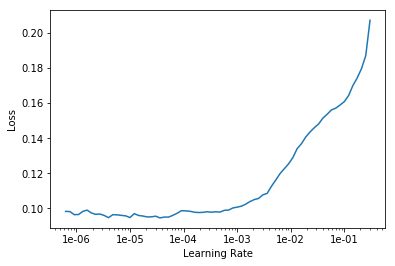

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.096410,0.094422,0.955630,0.918746,02:37
1,0.095679,0.088530,0.956080,0.923812,02:36
2,0.091984,0.084993,0.958725,0.928497,02:34
3,0.085832,0.082917,0.958428,0.928552,02:36
4,0.082023,0.082165,0.959249,0.929901,02:47


In [25]:
learn.save('stage-2-rn50')

---
**优化策略2 ：**
1. 先用较小的图片训练模型
    - 本次任务例子：kaggle提供的图片大小为256，而我们先用128的图片去训练
        - 小图片可以更快地训练更快地得到实验结果
        - 可以获得一个在较小图片(128)上表现良好的模型
        - 单独在小图或大图上过多的训练，会有过拟合的风险
        
2. 在较大的图片上训练模型
    - 2.1. 创建一个图片`size`更大的`databunch`。如将`size`由128改为256
    - 2.2. 固化模型  `learn.freeze()`
        - 固化网络所有参数，除了模型尾部的Linear层以及网络中的BN层的参数
        - 可用`learn.summary()`查看固化或解冻层
    - 2.3. 微调模型
        - 寻找最佳学习率
            - 因为不是重新开始训练，我们不会得到斜坡很大的loss变化曲线
            - 学习率选择经验：loss开始发散时(1e-1/2)学习率的1/10，即 lr = (1e-1/2) * (1/10) = 1e-2/2
        - 拟合模型
            - eg. `learn.fit_one_cycle(5, slice(lr))`
3. max_lr的设置
    - eg. `learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))`
        - `max_lr`中的第二部分的学习率(eg. 1e-4)，为模型训练上一阶段学习率的1/10(上一阶段学习率为1e-3)
        - `max_lr`中的第一部分的学习率(eg. 1e-6)，为图像中loss较低的前部分，并且它在loss发散(本例中大概在1e-4到1e-3之间开始发散)之前。
        
4. 解冻再训练模型
    - 也就是优化策略1的内容

In [26]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [27]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


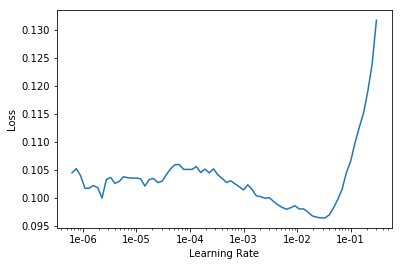

In [28]:
learn.lr_find()
learn.recorder.plot()

In [29]:
lr=1e-2/2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.088817,0.084473,0.958268,0.927690,05:04
1,0.085363,0.083614,0.957534,0.927824,05:12
2,0.083899,0.082662,0.960964,0.929009,05:11
3,0.081968,0.081494,0.959590,0.929493,05:13
4,0.078880,0.080666,0.960056,0.931572,05:13


In [30]:
learn.save('stage-1-256-rn50')

In [31]:
learn.unfreeze()

In [32]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.083694,0.084174,0.958958,0.926658,05:32
1,0.086246,0.084663,0.959016,0.926409,05:24
2,0.081805,0.082841,0.957032,0.926973,05:22
3,0.080741,0.080874,0.958544,0.930319,05:15
4,0.077634,0.080705,0.960193,0.930581,05:13


---
**优化完成，分析结果**  

`learn.recorder`：记录训练期间的epoch、损失、优化方法和对数据的评估
- `plot_losses`：显示训练损失和验证损失随迭代次数的变化
    - 现象：很多时候，loss实际上是在下降之前上升了一点
    - 原因：fit_one_cycle
        - 一种更准确更快的训练方法，源于论文 https://arxiv.org/abs/1803.09820
        - 训练时，学习率先上升再下降
            - 损失函数曲面(Loss function surface)往往是部分颠簸 + 部分平滑；学习率先变大再变小有助于我们越过颠簸区域的局部最小值到达全局最小区域
            - 学习率下降部分也称为“学习率退火(learning rate annealing)”
        - 参数解释补充
            - `max_l`：我们填入的学习率，其实是一个周期(cycle)中，最大的学习率。
            - `pct_star`：
                - Percentage of total number of epochs when learning rate rises during one cycle.
                - 一个周期内，学习率上升时占总epoch数的百分比。
                - eg. 假如一个周期(one cycle)，epoch数为50；那么pct_start=0.2则代表在前10个epoch训练过程中，学习率是上升的，并且最高上升到max_lr；10个epoch(达到最大学习率max_lr)之后，开始学习率退火。
    - 经验总结
        - 1. 如果用fit_one_cycle策略，如果损失曲线(验证损失函数会表现得更明显)是一直下降(没有先上升后下降)的话，那么可以适当增大学习率，特别是在解冻模型之后。
        - 2. 理想的损失函数曲线是先上后下，这样可以训练得更快，并且有更好的泛化效果。
- `plot_lr`：显示学习率随迭代次数的变化
    - 现象：由于fit_one_cycle的训练方式，一般可以看到学习率先上升再下降

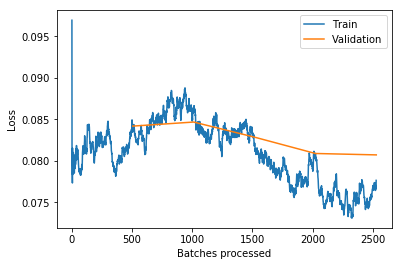

In [33]:
learn.recorder.plot_losses()

In [34]:
learn.save('stage-2-256-rn50')

You won't really know how you're going until you submit to Kaggle, since the leaderboard isn't using the same subset as we have for training. But as a guide, 50th place (out of 938 teams) on the private leaderboard was a score of `0.930`.

In [35]:
learn.export()

## fin

(This section will be covered in part 2 - please don't ask about it just yet! :) )

In [36]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p {path}  
! 7za -bd -y -so x {path}/test-jpg.tar.7z | tar xf - -C {path}
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z -p {path}  
! 7za -bd -y -so x {path}/test-jpg-additional.tar.7z | tar xf - -C {path}

 97%|██████████████████████████████████████▊ | 585M/603M [00:13<00:00, 39.6MB/s]
100%|████████████████████████████████████████| 603M/603M [00:13<00:00, 47.6MB/s]
 93%|█████████████████████████████████████   | 281M/304M [00:05<00:00, 61.0MB/s]
100%|████████████████████████████████████████| 304M/304M [00:06<00:00, 52.7MB/s]


In [37]:
test = ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional'))
len(test)

61191

In [38]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [39]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [40]:
labelled_preds[:5]

['artisinal_mine clear primary water',
 'clear primary',
 'clear primary',
 'clear primary',
 'clear primary']

In [41]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [42]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [43]:
df.to_csv(path/'submission.csv', index=False)

In [44]:
! kaggle competitions submit planet-understanding-the-amazon-from-space -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 2.19M/2.19M [00:00<00:00, 5.72MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

Private Leaderboard score: 0.9296 (around 80th)